In [24]:
# importing the necessary dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
train_df = pd.read_csv('D:/AIMT\Sem 2/AML 2404/Dataset/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('D:/AIMT/Sem 2/AML 2404/Dataset/sign_mnist_test/sign_mnist_test.csv')

In [26]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [27]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [28]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [12]:
print("Missing values:\n", train_df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", train_df.duplicated().sum())

Missing values:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
Duplicate rows: 0


In [71]:
def show_images(images,labels):
    images = images.values.reshape(-1,28,28,1)
    unique_labels = labels.unique()
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 5)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k] )
            ax[i,j].set_title(str(unique_labels[y_train[k]]))
            k = k+1;
#     plt.axis('off')
    plt.tight_layout()
    

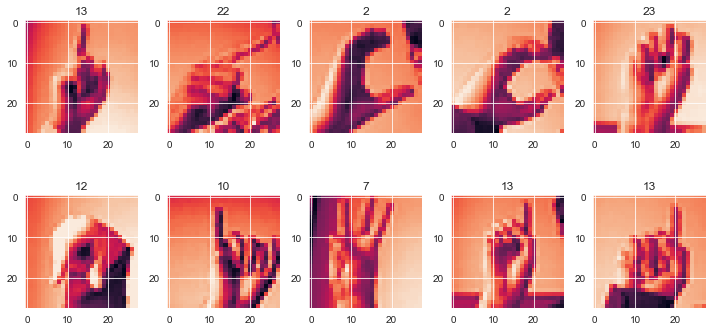

In [72]:
show_images(X_train, y_train)

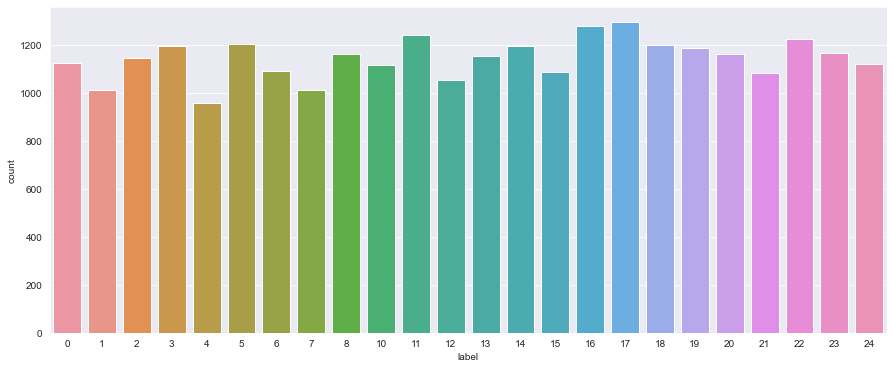

In [42]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=y_train)
plt.show()

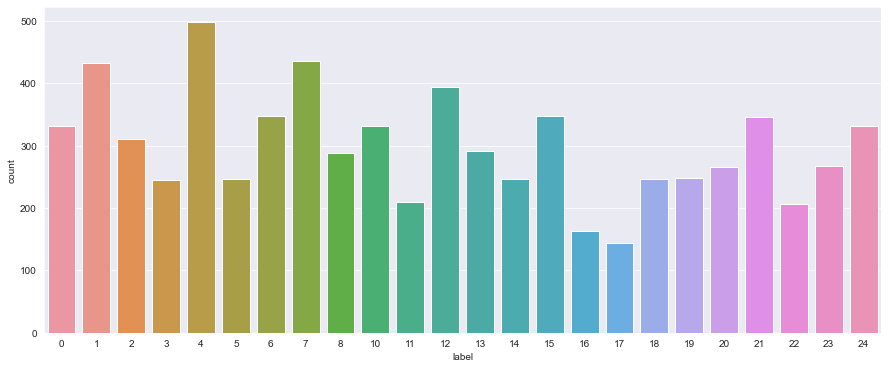

In [44]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=y_test)
plt.show()